### Importing Libraries

In [297]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from statsmodels.stats.outliers_influence import variance_inflation_factor


### Columns

- age: age of primary beneficiary

- sex: insurance contractor gender, female, male

- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- children: Number of children covered by health insurance / Number of dependents

- smoker: Smoking

- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

- charges: Individual medical costs billed by health insurance

### Reading the dataset

In [204]:
df = pd.read_csv('insurance.csv')

### Understanding the data

In [205]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [206]:
df.shape

(1338, 7)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [208]:
df.duplicated().sum()

1

#### Removing duplicated record

In [209]:
dup_rows = df[df.duplicated(keep=False)]

In [210]:
dup_rows

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [211]:
df.drop_duplicates(subset=None,keep='first',inplace=True)

In [212]:
df.duplicated().sum()

0

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [214]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [215]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

#### Check Null values

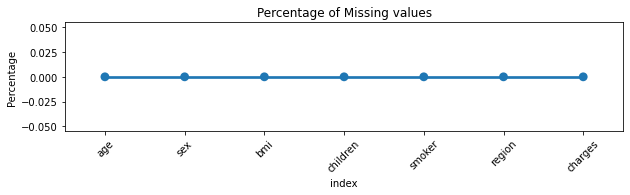

In [216]:
df_null = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
plt.figure(figsize=(10,2))
sns.pointplot(x='index',y=0,data=df_null)
plt.xticks(rotation=45,fontsize=10)
plt.title("Percentage of Missing values")
plt.ylabel("Percentage")
plt.show()

### Exploratory data Analysis

<AxesSubplot:xlabel='age', ylabel='Count'>

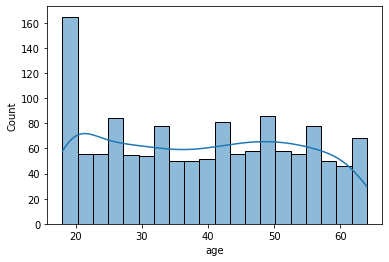

In [217]:
sns.histplot(x='age',kde=True,data=df,bins=20)

<AxesSubplot:xlabel='sex', ylabel='count'>

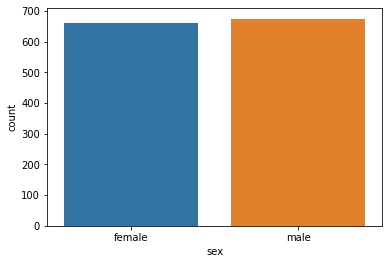

In [218]:
sns.countplot(x='sex',data=df)

In [219]:
round(((df['sex'].value_counts()/df.shape[0])*100),2)

male      50.49
female    49.51
Name: sex, dtype: float64

<AxesSubplot:ylabel='bmi'>

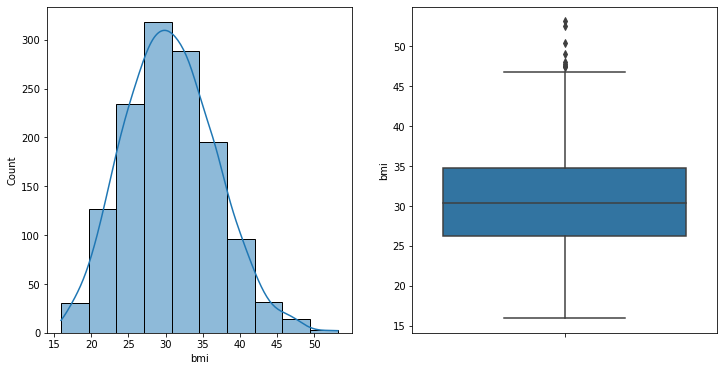

In [220]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.histplot(x='bmi',kde=True,bins=10,data=df,ax=axes[0])
sns.boxplot(y='bmi',data=df,ax=axes[1])

<AxesSubplot:xlabel='children', ylabel='count'>

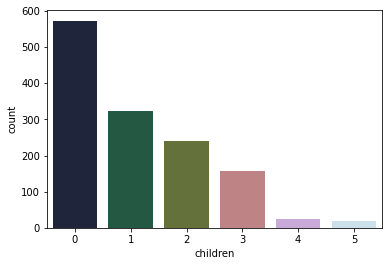

In [221]:
sns.countplot(x=df['children'],order=df['children'].value_counts().index[0:],palette='cubehelix')

<AxesSubplot:xlabel='smoker', ylabel='count'>

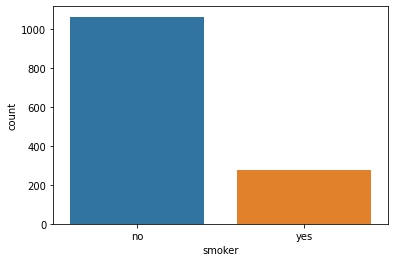

In [222]:
sns.countplot(x=df['smoker'],order=df['smoker'].value_counts().index[0:])

In [223]:
round(((df['smoker'].value_counts()/df.shape[0])*100),2)

no     79.51
yes    20.49
Name: smoker, dtype: float64

<AxesSubplot:xlabel='region', ylabel='count'>

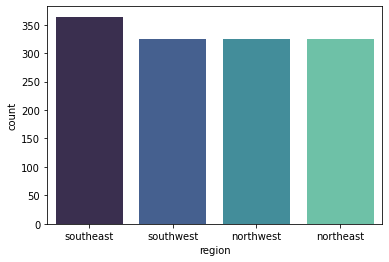

In [224]:
sns.countplot(x=df['region'],order=df['region'].value_counts().index[0:],palette='mako')

In [225]:
round(((df['region'].value_counts()/df.shape[0])*100),2)

southeast    27.23
southwest    24.31
northwest    24.23
northeast    24.23
Name: region, dtype: float64

<AxesSubplot:ylabel='charges'>

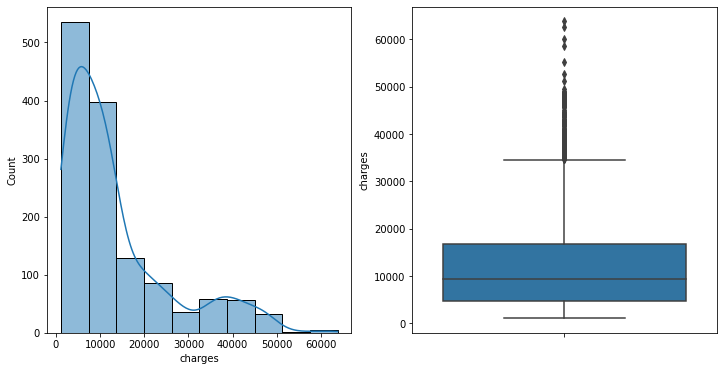

In [226]:
fig,axes = plt.subplots(1,2,figsize=(12,6))

sns.histplot(x='charges',kde=True,bins=10,data=df,ax=axes[0])
sns.boxplot(y='charges',data=df,ax=axes[1])

- Data is left skewed, so we will have to transform it

### Bivariate Analysis

In [227]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

### Age, Charges and smoker

<Figure size 864x864 with 0 Axes>

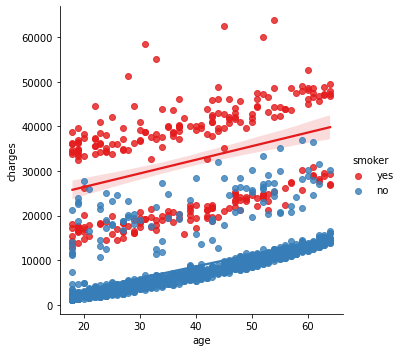

In [228]:
plt.figure(figsize=(12,12))
sns.lmplot(x='age',y='charges',hue='smoker',data=df,palette='Set1')

### Sex and Charges

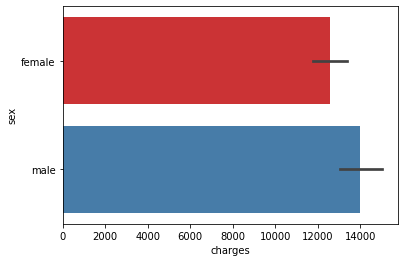

In [229]:
ax = sns.barplot(x='charges',y='sex',data=df,palette='Set1')

<Figure size 864x864 with 0 Axes>

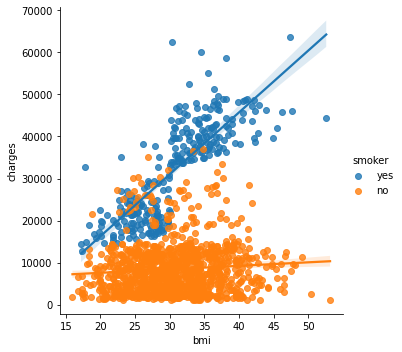

In [230]:
plt.figure(figsize=(12,12))
sns.lmplot(x='bmi',y='charges',hue='smoker',data=df)

### Children and Charges

<AxesSubplot:xlabel='children', ylabel='charges'>

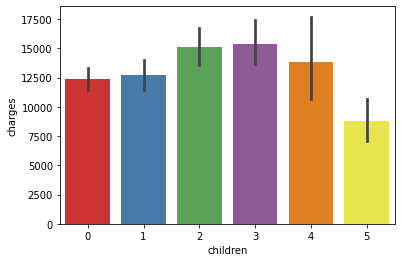

In [231]:
sns.barplot(x='children',y='charges',data=df,palette='Set1')

### Children, Region and Charges

<AxesSubplot:xlabel='region', ylabel='charges'>

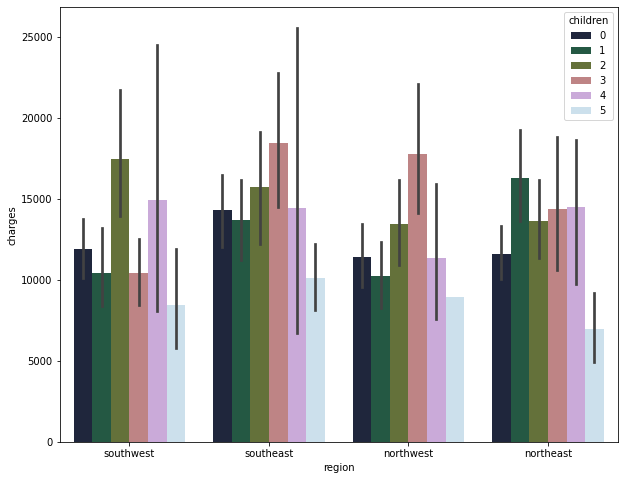

In [232]:
plt.figure(figsize=(10,8))
sns.barplot(x='region',y='charges',hue='children',data=df,palette='cubehelix')

### Region, Charges and Smoker

<AxesSubplot:xlabel='region', ylabel='charges'>

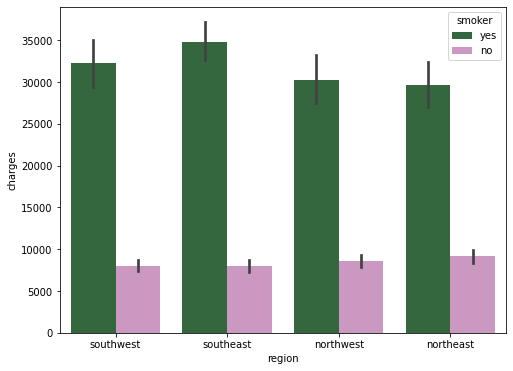

In [233]:
plt.figure(figsize=(8,6))
sns.barplot(x='region',y='charges',hue='smoker',data=df,palette='cubehelix')

<AxesSubplot:xlabel='region', ylabel='charges'>

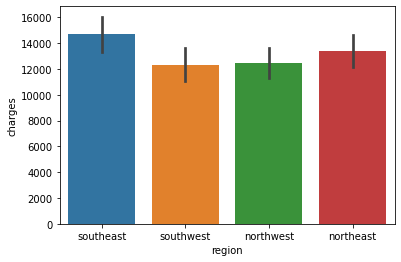

In [234]:
sns.barplot(x='region',y='charges',data=df,order=df['region'].value_counts().sort_values(ascending=False).index[0:])

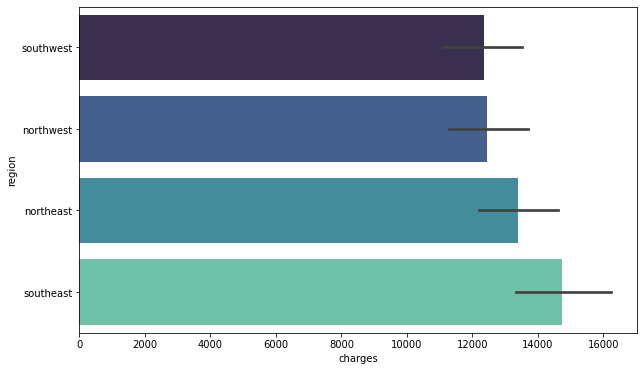

In [235]:
plt.figure(figsize=(10,6))

region_order = df.groupby('region')['charges'].aggregate(np.mean).reset_index().sort_values('charges',ascending=True)

sns.barplot(y='region',x='charges',data=df,order=region_order['region'],palette='mako')
plt.show()

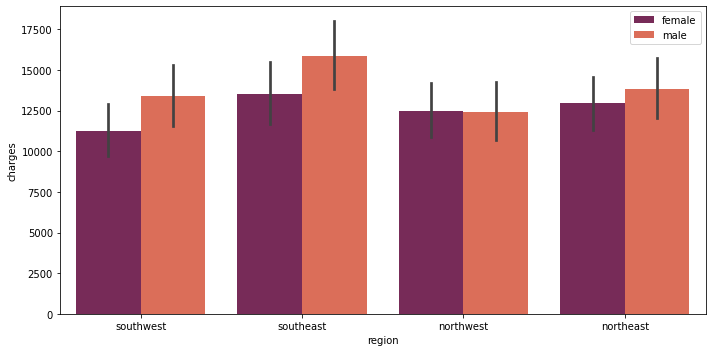

In [236]:
plt.figure(figsize=(10,5))
sns.barplot(x='region', y='charges', hue='sex', data=df, palette='rocket')
plt.legend(bbox_to_anchor=(1,1),loc='best')
plt.tight_layout()

<AxesSubplot:>

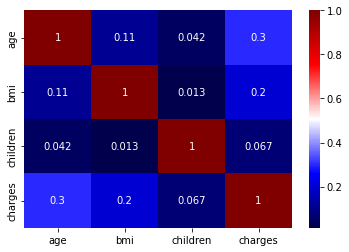

In [284]:
sns.heatmap(data=df.corr(),annot=True,cmap='seismic')

### Find Multicollinearity using variance_inflation_factor

In [299]:
df_c = df.copy()

In [300]:
df_c.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [301]:
df_c['sex'] = df_c['sex'].map({'male':0,'female':1})
df_c['smoker'] = df_c['smoker'].map({'no':0,'yes':1})

label_encoder = LabelEncoder()
df_c['region'] = label_encoder.fit_transform(df_c['region'])

In [302]:
df_c.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


In [313]:
X_vif = df_c.iloc[:,:-1]

In [314]:
X_vif.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,1
4,32,0,28.880,0,0,1


In [315]:
vif_data = pd.DataFrame()
vif_data['features'] = X_vif.columns

vif_data["VIF"] = [variance_inflation_factor(X_vif.values,i)
                  for i in range(X_vif.shape[1])]

In [318]:
vif_data.sort_values(by='VIF',ascending=False)

,features,VIF
2,bmi,10.107863
0,age,7.650382
5,region,2.925728
1,sex,1.910443
3,children,1.799924
4,smoker,1.251035


- The VIF for bmi and age exceeds 5 indicating a high multicollinearity

### Pipeline for data preprocessing, model selection, hyperparameter tuning etc.

In [237]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [238]:
X = df.drop(columns='charges')
y= df['charges']

In [239]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=24)

In [279]:
Score =  []
Cross_val = []
R2_score = []
MAE = []
MSE = []
RMSE = []

LR = LinearRegression()
lasso = Lasso()
ridge = Ridge()
DT = DecisionTreeRegressor()
KN = KNeighborsRegressor()
RFR = RandomForestRegressor()
ABR = AdaBoostRegressor()
GBR = GradientBoostingRegressor()
svr = SVR()

models = [LR,lasso,ridge,DT,KN,RFR,ABR,GBR,svr]

trf_col = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['sex','smoker','region'])
],remainder='passthrough')

trf_scale = StandardScaler()

for model in models:
    pipe = Pipeline([
        ('trf_col',trf_col),
        ('trf_scale',trf_scale),
        ('model',model)
    ])
    
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    
    Score.append(round(pipe.score(X_test,y_test)*100,2))
    R2_score.append(round(r2_score(y_test,y_pred)*100,2))
    MAE.append(mean_absolute_error(y_test,y_pred))
    MSE.append(mean_squared_error(y_test,y_pred))
    RMSE.append(mean_squared_error(y_test,y_pred)**(0.5))
   

model_names = ['Linear Regression','Lasso','Ridge','DecisionTree Regressor',' KNeighbors Regressor',
              'RandomForest Regressor','AdaBoost Regressor','GradientBoosting Regressor','Support Vector Regressor']

df_result = pd.DataFrame({'Score':Score,
                          'R2_score':R2_score,
                          'MAE':MAE,
                          'MSE':MSE,
                          'RMSE':RMSE
                         },index=model_names)

In [280]:
df_result.sort_values(by='Score',ascending=False)

,Score,R2_score,MAE,MSE,RMSE
GradientBoosting Regressor,87.65,87.65,2483.519782,2.095857e+07,4578.053502
RandomForest Regressor,85.87,85.87,2766.679369,2.396734e+07,4895.644520
AdaBoost Regressor,84.20,84.20,4106.903804,2.680114e+07,5176.981597
KNeighbors Regressor,79.75,79.75,3830.456222,3.436201e+07,5861.911392
Linear Regression,76.99,76.99,4477.521772,3.903419e+07,6247.734722
Lasso,76.99,76.99,4477.534531,3.904009e+07,6248.207279
Ridge,76.98,76.98,4478.594233,3.904522e+07,6248.617443
DecisionTree Regressor,67.98,67.98,3555.201808,5.431476e+07,7369.855050
Support Vector Regressor,-13.87,-13.87,9179.362104,1.931762e+08,13898.785894


### Final Model - Gradient Boosting Regressor 

In [281]:
trf_col = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['sex','smoker','region'])
],remainder='passthrough')


trf_scale = StandardScaler()

trf_GBR = GradientBoostingRegressor()

GBR_pipe = Pipeline([
    ('trf_col',trf_col),
    ('trf_scale',trf_scale),
    ('trf_GBR',trf_GBR)
])

GBR_pipe.fit(X_train,y_train)

y_pred = GBR_pipe.predict(X_test)


print('Score {}'.format(round(GBR_pipe.score(X_test,y_test)*100,2)))
print('R2_score {}'.format(round(r2_score(y_test,y_pred)*100,2)))
print('MAE {}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE {}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE {}'.format(mean_squared_error(y_test,y_pred)**(0.5)))

Score 87.65
R2_score 87.65
MAE 2483.878564423622
MSE 20959469.63533059
RMSE 4578.151333817023


### Hyperparameter Tuning

In [286]:
grid_param = {
    'trf_GBR':[GradientBoostingRegressor()],
    'trf_GBR__loss':['squared_error', 'absolute_error'],
    'trf_GBR__learning_rate':[float(x) for x in np.linspace(start=0.001,stop=0.1,num=5)],
    'trf_GBR__n_estimators':[int(x) for x in np.linspace(start=80,stop=150,num=5)],
    'trf_GBR__max_depth':[int(x) for x in np.linspace(start=1,stop=40, num=5)],
    'trf_GBR__subsample':[float(x) for x in np.linspace(start=0.1,stop=1,num=5)]
}

In [291]:
grid_search = GridSearchCV(GBR_pipe,param_grid=grid_param,verbose=2, n_jobs=-1)

In [292]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 1250 candidates, totalling 6250 fits


GridSearchCV(estimator=Pipeline(steps=[('trf_col',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('col_tnf',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse=False),
                                                                         ['sex',
                                                                          'smoker',
                                                                          'region'])])),
                                       ('trf_scale', StandardScaler()),
                                       ('trf_GBR',
                                        GradientBoostingRegressor())]),
             n_jobs=-1,
             param_grid={'trf_GBR': [GradientBoostingRegressor(learning_rate=0.025750000000000002,
       

In [293]:
grid_search.best_params_

{'trf_GBR': GradientBoostingRegressor(learning_rate=0.025750000000000002, max_depth=20,
                           n_estimators=115, subsample=0.1),
 'trf_GBR__learning_rate': 0.025750000000000002,
 'trf_GBR__loss': 'squared_error',
 'trf_GBR__max_depth': 20,
 'trf_GBR__n_estimators': 115,
 'trf_GBR__subsample': 0.1}

In [294]:
print("The mean accuracy of the model is:",grid_search.score(X_test,y_test))

The mean accuracy of the model is: 0.8705797347905906


### Final model: With hyperparameters

In [296]:
trf_col = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),['sex','smoker','region'])
],remainder='passthrough')


trf_scale = StandardScaler()

trf_GBR = GradientBoostingRegressor(loss='squared_error',learning_rate=0.025750000000000002,max_depth=20,
                                   n_estimators=115,subsample=0.1)

GBR_pipe = Pipeline([
    ('trf_col',trf_col),
    ('trf_scale',trf_scale),
    ('trf_GBR',trf_GBR)
])

GBR_pipe.fit(X_train,y_train)

y_pred = GBR_pipe.predict(X_test)


print('Score {}'.format(round(GBR_pipe.score(X_test,y_test)*100,2)))
print('R2_score {}'.format(round(r2_score(y_test,y_pred)*100,2)))
print('MAE {}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE {}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE {}'.format(mean_squared_error(y_test,y_pred)**(0.5)))

Score 86.6
R2_score 86.6
MAE 2955.283597368277
MSE 22728146.308316935
RMSE 4767.404567300423
